# 회귀(Regression)

: 예측 모델링 기법 중 하나로 독립 변수와 종속 변수 간의 관계를 모델링하여 연속적인 값을 예측하는 것을 목표로 한다.

- 선형회귀 : 가장 기본적인 회귀 방법, 선형관계를 모델링(가장 기본적인 회귀 방법)
- 다중회귀 : 두 개 이상의 독립변수 사용
- 다항회귀 : 독립변수와 종속변수 간의 비선형관계를 모델링
- 릿지회귀 : 과적합을 방지해주는 회귀(L2 정규화)
- 라쏘회귀 : L1 정규화
- 로지스틱회귀 : 종속변수가 범주형인 경우(분류 문제에 쓰인다.) ⭐️⭐️⭐️
- 엘라스틱 넷 회귀 : L1, L2 정규화

## 로지스틱회귀(Logistic Regression)
: 종속변수가 범주형인 경우(분류 문제에 쓰인다.)

- 이진 분류 문제를 해결하는데 주로 사용된다.
- 로지스틱 함수(시그모이드 함수) 기반으로 사용된다.
    - 0과 1 사이의 확률값을 가지고 있다.
- 로지스틱 함수의 출력은 입력 벡터 x가 특정 클래스에 속할 확률을 말한다.(P(y=1|x))(클래스 1이라고 가정)
    - P(y=0|x) = 1 - σ(z)
 
1) 장점
- 직관적으로 계수와 변수의 영향을 나타내 해석하기 쉽다.
- 적은 데이터에서도 잘 동작하고, 계산비용이 작다(적다).

2) 단점
- 이진분류 문제를 해결하는데 사용되기 때문에, 다중 클래스에 대한 분류를 진행하기 위해서는 변환 기법들이 필요하다.
- 비선형 문제에 적합하지 않을 수 있다.(독립변수와 종속변수 사이의 선형 관계를 가정하여 진행하기 때문에)

In [24]:
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='AppleGothic')

In [25]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [26]:
print(breast_cancer.feature_names)
print()
print(breast_cancer.target_names) # malignant:0, benign:1

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


In [27]:
breast_cancer.target = np.where(breast_cancer.target==0, 1, 0)
breast_cancer.target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [28]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.33, random_state=42)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 로지스틱 회귀의 beta 해석
- 종속 변수에 대한 독립변수의 영향을 베타 값과 오즈 비율(odds ratio)를 사용해 해석한다.

#### 베타 값
: 독립 변수가 한 단위 증가할 때, 로그 오즈(log(Odds))가 얼마나 변하는지
- 베타 > 0(양수일 때) : 독립 변수의 값이 증가할 때, 종속 변수의 1의 확률이 증가한다.
- 베타 < 0(음수일 때) : 독립 변수의 값이 증가할 때, 종속 변수의 1의 확률이 감소한다.

#### 오즈 비율
: 베타 값을 단순히 지수화한 값
- 독립 변수가 한 단위 증가할 때, 오즈가 몇 배 증가하는지
    - odds > 1 : 독립 변수의 값이 증가할 때, 종속 변수의 1의 확률이 증가한다.
    - odds < 1 : 독립 변수의 값이 증가할 때, 종속 변수의 1의 확률이 감소한다.



In [34]:
column_name = ['const'] + breast_cancer.feature_names.tolist() # 상수항과 데이터 셋의 피처 이름
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2) # intercept_ : 절편(상수항에 대한 베타값), coef_ : 베타 값(피처에 대한 베타값)
odds = np.exp(beta).round(2) # 베타 값에 대한 지수화
interpret = np.where(beta>0, 'risky', 'protective') # 베타 값이 양수 =  'risky', 음수 = 'protective'

beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret], index=column_name, columns=['beta', 'exp(beta)', 'interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-0.29,0.75,protective
mean radius,0.36,1.43,risky
mean texture,0.38,1.46,risky
mean perimeter,0.35,1.42,risky
mean area,0.41,1.51,risky
mean smoothness,0.08,1.08,risky
mean compactness,-0.63,0.53,protective
mean concavity,0.8,2.23,risky
mean concave points,1.09,2.97,risky
mean symmetry,-0.16,0.85,protective


In [35]:
# X_test에 대한 P(Y=0),P(Y=1) 예측 확률값
model.predict_proba(X_test)

array([[8.64902269e-01, 1.35097731e-01],
       [2.23651234e-05, 9.99977635e-01],
       [3.91011864e-03, 9.96089881e-01],
       [9.99228594e-01, 7.71405842e-04],
       [9.99887972e-01, 1.12027560e-04],
       [3.44674733e-10, 1.00000000e+00],
       [6.89952540e-09, 9.99999993e-01],
       [4.50996959e-02, 9.54900304e-01],
       [5.68461538e-01, 4.31538462e-01],
       [9.98877342e-01, 1.12265793e-03],
       [9.40524828e-01, 5.94751717e-02],
       [1.58419162e-02, 9.84158084e-01],
       [9.92807095e-01, 7.19290547e-03],
       [1.72240667e-01, 8.27759333e-01],
       [9.97417343e-01, 2.58265666e-03],
       [1.51742907e-03, 9.98482571e-01],
       [9.97276702e-01, 2.72329797e-03],
       [9.99984414e-01, 1.55858428e-05],
       [9.99998758e-01, 1.24217565e-06],
       [2.79993775e-06, 9.99997200e-01],
       [9.15834681e-01, 8.41653188e-02],
       [9.88053525e-01, 1.19464748e-02],
       [1.59140925e-08, 9.99999984e-01],
       [9.99880380e-01, 1.19619827e-04],
       [9.982205

In [36]:
# 직접 계산
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1, 1))

# P(Y=1)
p_1 = 1 / (1+np.exp(-Xbeta))

pd.DataFrame(np.concatenate([p_1, model.predict_proba(X_test)[:,1].reshape(-1,1)],axis=1), columns=['직접계산', '패키지사용'])

,직접계산,패키지사용
0,0.135052,0.135098
1,0.999978,0.999978
2,0.996107,0.996090
3,0.000769,0.000771
4,0.000111,0.000112
...,...,...
183,0.984856,0.984879
184,0.999682,0.999682
185,0.949882,0.950286
186,0.585701,0.584676


In [37]:
Cut_off = np.linspace(0.00001, 0.99, 10)
Cut_off

array([1.00000000e-05, 1.10008889e-01, 2.20007778e-01, 3.30006667e-01,
       4.40005556e-01, 5.50004444e-01, 6.60003333e-01, 7.70002222e-01,
       8.80001111e-01, 9.90000000e-01])

In [39]:
for cutoff in Cut_off:
    y_pred = np.where(p_1.reshape(-1) >= cutoff, 1, 0)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print(f'정확도:{acc:0.2f}, 민감도 : {recall:0.2f}, 정밀도 : {precision:0.2f}, cutoff:{cutoff:0.2f}')

정확도:0.37, 민감도 : 1.00, 정밀도 : 0.36, cutoff:0.00
정확도:0.93, 민감도 : 0.99, 정밀도 : 0.85, cutoff:0.11
정확도:0.95, 민감도 : 0.99, 정밀도 : 0.88, cutoff:0.22
정확도:0.96, 민감도 : 0.99, 정밀도 : 0.92, cutoff:0.33
정확도:0.98, 민감도 : 0.99, 정밀도 : 0.96, cutoff:0.44
정확도:0.98, 민감도 : 0.97, 정밀도 : 0.97, cutoff:0.55
정확도:0.98, 민감도 : 0.96, 정밀도 : 0.98, cutoff:0.66
정확도:0.98, 민감도 : 0.96, 정밀도 : 1.00, cutoff:0.77
정확도:0.96, 민감도 : 0.90, 정밀도 : 1.00, cutoff:0.88
정확도:0.92, 민감도 : 0.78, 정밀도 : 1.00, cutoff:0.99


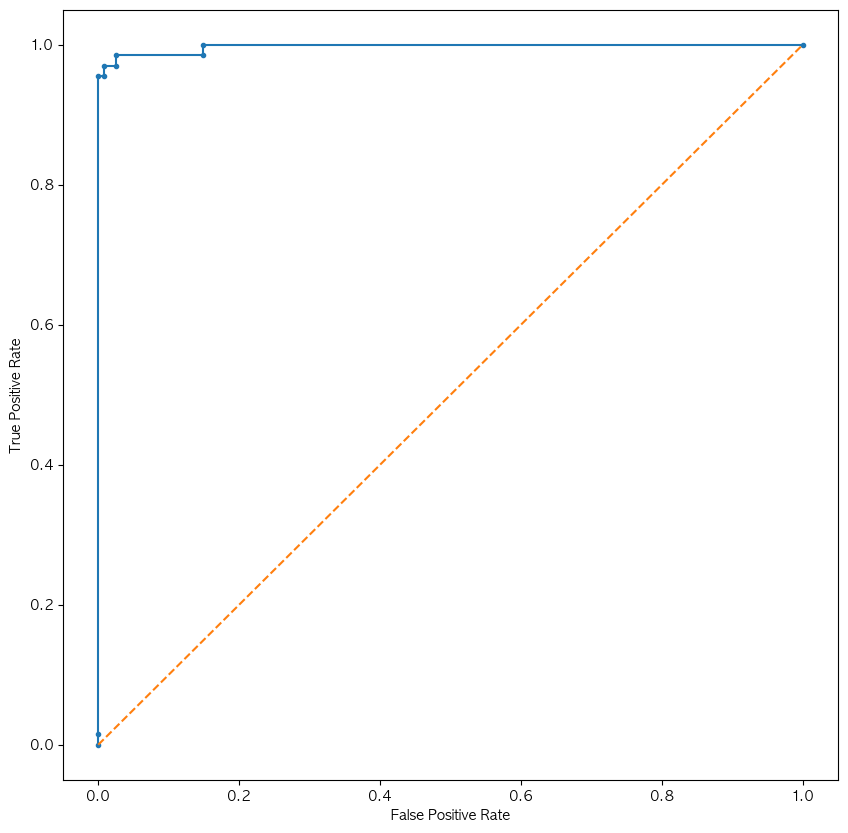

In [41]:
# ROC 커브
probs = model.predict_proba(X_test)[:,1]
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

plt.figure(figsize=(10,10))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### train.csv 파일 가져와서 분석해보기

In [53]:
data = pd.read_csv('Train.csv')

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [56]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [57]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

print('Accuracy : ', accuracy_score(y_test, y_pred))
print()
print('-Confusion Matrix- \n', confusion_matrix(y_test, y_pred))
print()
print('-Report-\n', classification_report(y_test, y_pred))

Accuracy :  0.8169491525423729

-Confusion Matrix- 
 [[153  22]
 [ 32  88]]

-Report-
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

